# Introduction

* Hello, my name is Shorter
* This is a project attempting to construct a ML to predict unemployment

## Project Objective 
* 8

## Executive Summary


>* Analysis of the data showed that unemployment rates are fairly small across most population groups
>* Statistical testing confirmed the results across nearly all features
>* The small percentage of the population that is unemployed actually made it more difficult to correctly model
>* Accuracy scores for the models were high, but true negative rates were extremely low for models that scored best in that area

# Import Section

In [1]:
import pandas as pd
import model
import wrangle

# Wrangle (Acquire and Prep)
> 
* Feature Engineering
> Flattening:
-
> Features:
-   
> Clusters:
-   
> Split:  
- Train: 54%  
- Validate: 24%  
- Test: 20%  
> Scaled:  
- MinMaxScaler(): Used for cluster engineering and modeling  

    

## Acquire

In [ ]:
from importlib import reload
reload()

In [4]:
#calling prepare/acquire functions from module to acruire data subsets
df = wrangle.prep_aug()

train, validate, test, train_scaled, validate_scaled, test_scaled = model.split_scale(df)

/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[np.where(df.peafnow == 1)]['peafever'] = 1
/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.pehrftpt == 1]['pehruslt'] = more_than_35
/Users/sinao/codeup-data-science/unemployment_project/wrangle.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

## Exploration Questions 
* Includes visualizations and statistical tests
* Primarily focused on items that appear on the typical resume or job application

### Spotlight - Industry 
* **Question:** Which industry shows the largest population proportion change between employed and unemployed?  
* **Answer:** Leisure and Hospitality. This industry also has the highest unemployment rate at 6%

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between industry of typical employment and employment status   
>* ${H_a}$: There is a relationship between industry of typical employment and employment status  
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

chi^2: 3659.8474
p: 0.0000
degrees of freedom: 13
Reject null hypothesis


<Figure size 1440x432 with 0 Axes>

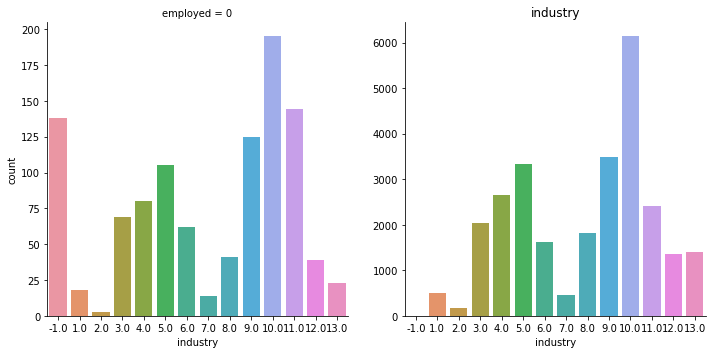

population_proportions                   unemployment_rate
                       employed unemployed change                  
industry                                                           
-1.0                        NaN      0.131    NaN              1.00
 11.0                     0.088      0.136 -0.048              0.06
 6.0                      0.059      0.059  0.000              0.04
 9.0                      0.127      0.118  0.009              0.03
 1.0                      0.019      0.017  0.002              0.03
 3.0                      0.074      0.065  0.009              0.03
 10.0                     0.224      0.185  0.039              0.03
 5.0                      0.122      0.099  0.022              0.03
 7.0                      0.017      0.013  0.004              0.03
 4.0                      0.097      0.076  0.021              0.03
 12.0                     0.050      0.037  0.013              0.03
 8.0                      0.066      0.039  0.027              0.02
 2.0                      0.006      0.003  0.003              0.02
 13.0                     0.051      0.022  0.030              0.02

In [5]:
model.spotlight_stats(train, 'industry')

### Spotlight - Race
* **Question:** Which industry shows the largest population proportion change between employed and unemployed?

* **Answer:** Indivduals identifying as White show the largest population proportion change with a drop of nearly 10% when comparing employed vs unemployed. Those identifying as mixed race other than with white, and Indigenous have the highest unemployed rates at 12% and 7% respectively. 

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between `race` and `employment` status   
>* ${H_a}$: There is a relationship between `race` and `employment` status   
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

chi^2: 107.4868
p: 0.0000
degrees of freedom: 6
Reject null hypothesis


<Figure size 1440x432 with 0 Axes>

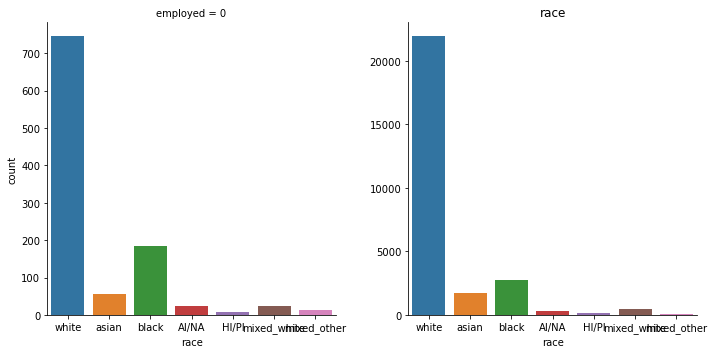

population_proportions                   unemployment_rate
                          employed unemployed change                  
race                                                                  
mixed_other                  0.003      0.012 -0.009              0.12
AI/NA                        0.012      0.023 -0.011              0.07
black                        0.099      0.175 -0.076              0.06
HI/PI                        0.006      0.009 -0.003              0.06
mixed_white                  0.016      0.024 -0.008              0.06
white                        0.801      0.705  0.095              0.03
asian                        0.063      0.052  0.011              0.03

In [6]:
model.spotlight_stats(train, 'race')

### Spotlight - Professional Certification
* **Question:** What is the effect of having a professional certification? 
 
* **Answer:** Leisure and Hospitality. This industry also has the highest unemployment rate at 6%

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between having a `professional_certification` and `employment`  
>* ${H_a}$: There is a relationship between having a `professional_certification` and `employment`    
>* ${\alpha}$: .05
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

chi^2: 56.8554
p: 0.0000
degrees of freedom: 1
Reject null hypothesis


<Figure size 1440x432 with 0 Axes>

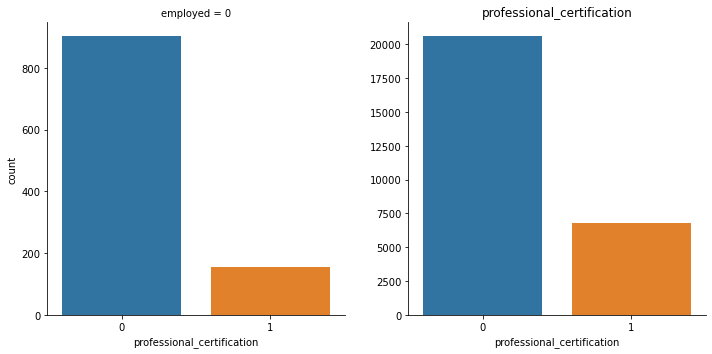

population_proportions                    \
                                         employed unemployed change   
professional_certification                                            
0                                           0.752      0.854 -0.102   
1                                           0.248      0.146  0.102   

                           unemployment_rate  
                                              
professional_certification                    
0                                       0.04  
1                                       0.02

In [7]:
model.spotlight_stats(train, 'professional_certification')

## Overall Exploration Takeaways
* 

# Modeling


## Top Models

## Test
* Best Performing Model:
    - Name:
    - Type:  
    - Alpha: 0
    - Features: 

In [18]:
#calls function from  model module to fit and test the best perfoming model on the test subset 

,Name,RMSE
0,pred_median,0.153141
1,LARS_1,0.152985


# Conclusion

## Summary of Key Findings
>* As a portion the population unemployed individuals are small. 
>* Overwhelming majorities of people are either employed or not in the labor force due to disability, retirement, or other reasons. 
>* Testing confirms that being educated, married, and with a professional certification are good ways to stay away from unemployement. 
>* From a modeling/ML perspective this project was not one where the Accuracy/Scoring played a big part. The best models in that area underperformed when it came to correctly identifying unemployed persons.  
>* Feature sets informed by 
    * Best model 
>* Model gain on predictive performance vs. baseline prediction 
    *  

## Suggestions and Next Steps
>* Do not suggest using these models for any sort of analysis or research
>* Subpar performance when attempting to correctly identify employment status
>* Will work to expand the data set, and possibly port project over to the wider 2020 census data
>* Also would like to expand skillset to work with other ML strategies for classification
>* Future development of this project will focus on really driving up the True Negative Rates of the model metrics so I can better capture employment disposition
